In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
DATA_DIR = 'data/'

In [3]:
!ls {DATA_DIR}

building_metadata.csv  test.csv   weather_test.csv
sample_submission.csv  train.csv  weather_train.csv


# Load data 

In [4]:
building_metadata = pd.read_csv(DATA_DIR + 'building_metadata.csv')
weather_train = pd.read_csv(DATA_DIR + 'weather_train.csv')
weather_test = pd.read_csv(DATA_DIR + 'weather_test.csv')
train = pd.read_csv(DATA_DIR + 'train.csv')
test = pd.read_csv(DATA_DIR + 'test.csv')

In [5]:
map_meter2desc = {0: 'electricity', 1: 'chilledwater', 2: 'steam', 3: 'hotwater'}

In [6]:
numerical = [
    'square_feet', 
    'year_built', 
    'floor_count', 
    'air_temperature', 
    'cloud_coverage', 
    'dew_temperature',
    'precip_depth_1_hr',
    'sea_level_pressure',
    'wind_direction',
    'wind_speed',
]

categorical = [
    'primary_use',
]

# EDA

In [7]:
building_metadata

,site_id,building_id,primary_use,square_feet,year_built,floor_count
0,0,0,Education,7432,2008.0,NaN
1,0,1,Education,2720,2004.0,NaN
2,0,2,Education,5376,1991.0,NaN
3,0,3,Education,23685,2002.0,NaN
4,0,4,Education,116607,1975.0,NaN
...,...,...,...,...,...,...
1444,15,1444,Entertainment/public assembly,19619,1914.0,NaN
1445,15,1445,Education,4298,NaN,NaN
1446,15,1446,Entertainment/public assembly,11265,1997.0,NaN
1447,15,1447,Lodging/residential,29775,2001.0,NaN


In [8]:
weather_train

,site_id,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,2016-01-01 00:00:00,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
1,0,2016-01-01 01:00:00,24.4,NaN,21.1,-1.0,1020.2,70.0,1.5
2,0,2016-01-01 02:00:00,22.8,2.0,21.1,0.0,1020.2,0.0,0.0
3,0,2016-01-01 03:00:00,21.1,2.0,20.6,0.0,1020.1,0.0,0.0
4,0,2016-01-01 04:00:00,20.0,2.0,20.0,-1.0,1020.0,250.0,2.6
...,...,...,...,...,...,...,...,...,...
139768,15,2016-12-31 19:00:00,3.0,NaN,-8.0,NaN,NaN,180.0,5.7
139769,15,2016-12-31 20:00:00,2.8,2.0,-8.9,NaN,1007.4,180.0,7.7
139770,15,2016-12-31 21:00:00,2.8,NaN,-7.2,NaN,1007.5,180.0,5.1
139771,15,2016-12-31 22:00:00,2.2,NaN,-6.7,NaN,1008.0,170.0,4.6


In [9]:
weather_test

,site_id,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,2017-01-01 00:00:00,17.8,4.0,11.7,NaN,1021.4,100.0,3.6
1,0,2017-01-01 01:00:00,17.8,2.0,12.8,0.0,1022.0,130.0,3.1
2,0,2017-01-01 02:00:00,16.1,0.0,12.8,0.0,1021.9,140.0,3.1
3,0,2017-01-01 03:00:00,17.2,0.0,13.3,0.0,1022.2,140.0,3.1
4,0,2017-01-01 04:00:00,16.7,2.0,13.3,0.0,1022.3,130.0,2.6
...,...,...,...,...,...,...,...,...,...
277238,15,2018-12-31 19:00:00,3.3,NaN,1.7,NaN,1018.3,150.0,7.7
277239,15,2018-12-31 20:00:00,2.8,NaN,1.1,NaN,1017.8,140.0,5.1
277240,15,2018-12-31 21:00:00,2.8,NaN,1.7,-1.0,1017.2,140.0,6.2
277241,15,2018-12-31 22:00:00,2.8,NaN,2.2,8.0,1016.1,140.0,5.1


In [10]:
train

,building_id,meter,timestamp,meter_reading
0,0,0,2016-01-01 00:00:00,0.000
1,1,0,2016-01-01 00:00:00,0.000
2,2,0,2016-01-01 00:00:00,0.000
3,3,0,2016-01-01 00:00:00,0.000
4,4,0,2016-01-01 00:00:00,0.000
...,...,...,...,...
20216095,1444,0,2016-12-31 23:00:00,8.750
20216096,1445,0,2016-12-31 23:00:00,4.825
20216097,1446,0,2016-12-31 23:00:00,0.000
20216098,1447,0,2016-12-31 23:00:00,159.575


In [11]:
test

,row_id,building_id,meter,timestamp
0,0,0,0,2017-01-01 00:00:00
1,1,1,0,2017-01-01 00:00:00
2,2,2,0,2017-01-01 00:00:00
3,3,3,0,2017-01-01 00:00:00
4,4,4,0,2017-01-01 00:00:00
...,...,...,...,...
41697595,41697595,1444,0,2018-05-09 07:00:00
41697596,41697596,1445,0,2018-05-09 07:00:00
41697597,41697597,1446,0,2018-05-09 07:00:00
41697598,41697598,1447,0,2018-05-09 07:00:00


# Combine table

In [12]:
df = train
df = df.merge(building_metadata, on='building_id')
df = df.merge(weather_train, on=['site_id', 'timestamp'])

In [13]:
df['log_meter_reading'] = df['meter_reading'].apply(lambda x: np.log(x + 1))
df = df.query('meter_reading > 0')

In [14]:
df0 = df.query('meter == 0')
df1 = df.query('meter == 1')
df2 = df.query('meter == 2')
df3 = df.query('meter == 3')

# Target dist.

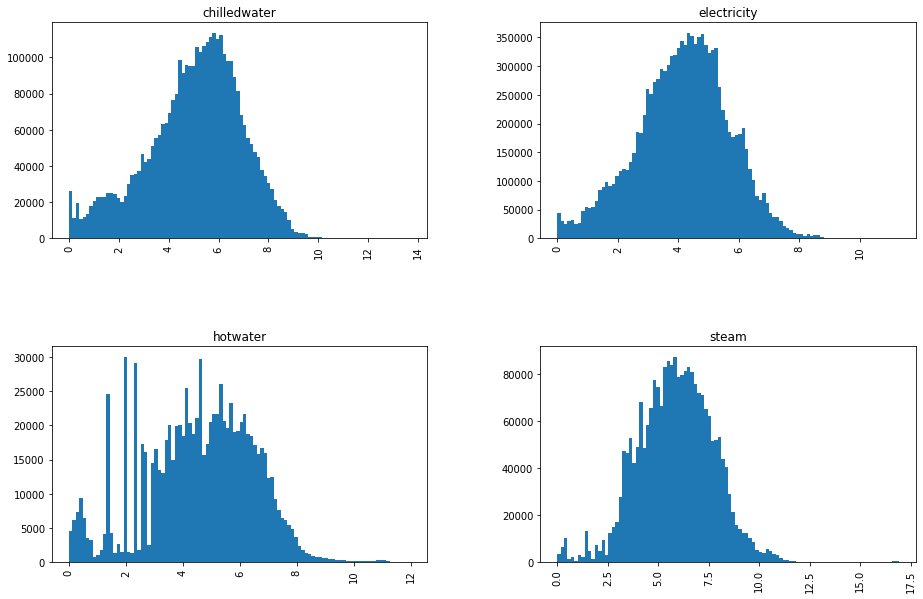

In [36]:
df.merge(pd.DataFrame(map_meter2desc.items(), columns=['meter', 'meter_desc']), on='meter')\
    .hist(bins=100, column='log_meter_reading', by='meter_desc', figsize=(15, 10), layout=(2, 2));

# Feature dist.

## Electricity (meter = 0) 

In [37]:
df0.head()

,building_id,meter,timestamp,meter_reading,site_id,primary_use,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,log_meter_reading
45,46,0,2016-01-01 00:00:00,53.2397,0,Retail,9045,2016.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0,3.993413
72,74,0,2016-01-01 00:00:00,43.0013,0,Parking,387638,1997.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0,3.784219
91,93,0,2016-01-01 00:00:00,52.4206,0,Office,33370,1982.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0,3.978196
123,20,0,2016-01-01 01:00:00,91.9886,0,Education,110272,1977.0,NaN,24.4,NaN,21.1,-1.0,1020.2,70.0,1.5,4.532477
148,46,0,2016-01-01 01:00:00,53.6492,0,Retail,9045,2016.0,NaN,24.4,NaN,21.1,-1.0,1020.2,70.0,1.5,4.000935


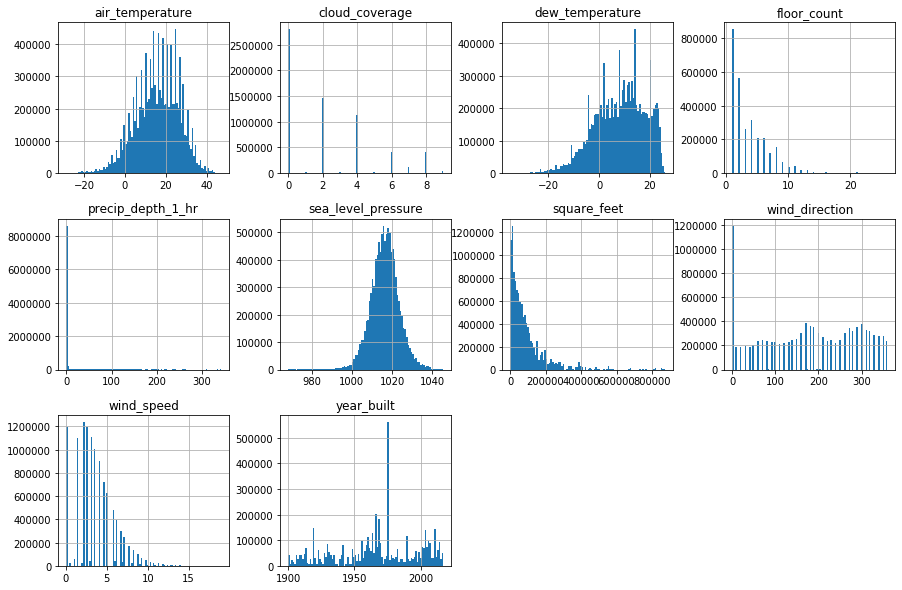

In [38]:
df0[numerical].hist(bins=100, figsize=(15, 10), layout=(3, 4));

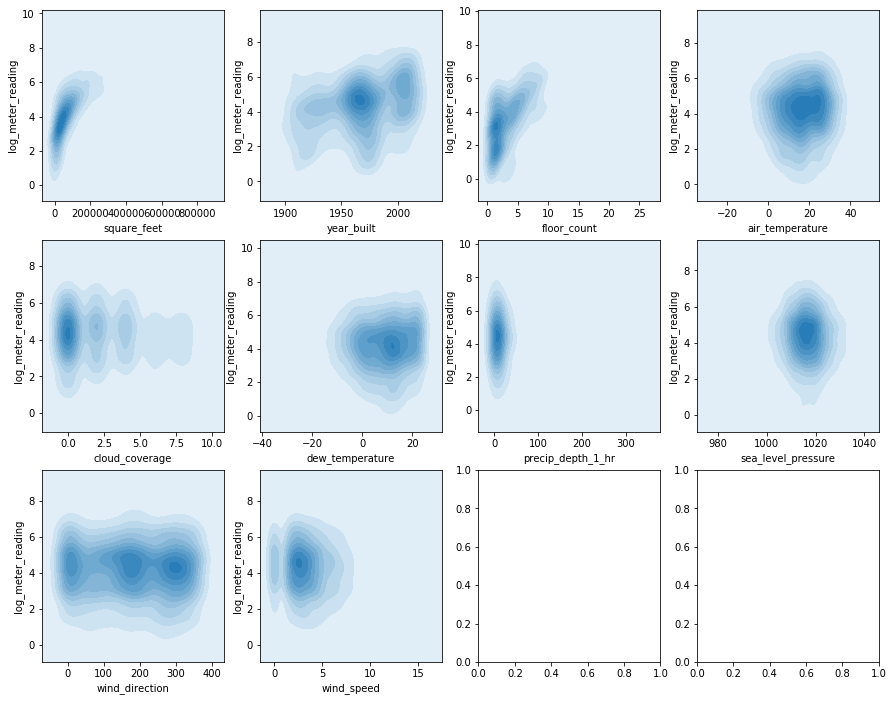

In [72]:
fig, ax = plt.subplots(3, 4, figsize=(15, 12))
for var, subplot in zip(numerical, ax.flatten()):
    d = df0[[var, 'log_meter_reading']].dropna()
    d = d.sample(int(0.001 * d.shape[0]))
    if var == 'precip_depth_1_hr':
        d = d.query('precip_depth_1_hr > 0')
    sns.kdeplot(d[var], d['log_meter_reading'], shade=True, ax=subplot)
    subplot.set_xlabel(var)
    subplot.set_ylabel('log_meter_reading')

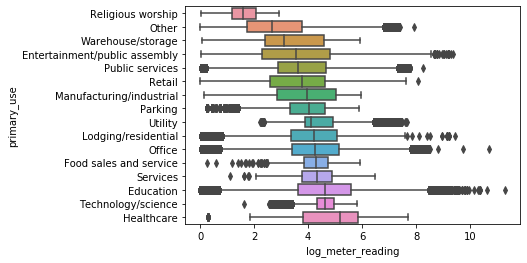

In [48]:
sorted_nb = df0.groupby(['primary_use'])['log_meter_reading'].median().sort_values()
sns.boxplot(y=df0['primary_use'], x=df0['log_meter_reading'], order=sorted_nb.index, orient='h')

## Chilledwater (meter = 1) 

In [49]:
df1.head()

,building_id,meter,timestamp,meter_reading,site_id,primary_use,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,log_meter_reading
146446,7,1,2016-02-29 09:00:00,1857.260,0,Education,121074,1989.0,NaN,12.8,NaN,8.9,0.0,1021.9,0.0,0.0,7.527396
146449,9,1,2016-02-29 09:00:00,590.945,0,Office,27000,2010.0,NaN,12.8,NaN,8.9,0.0,1021.9,0.0,0.0,6.383414
146454,13,1,2016-02-29 09:00:00,1224.100,0,Education,99380,2000.0,NaN,12.8,NaN,8.9,0.0,1021.9,0.0,0.0,7.110778
146456,14,1,2016-02-29 09:00:00,1435.150,0,Education,86250,2013.0,NaN,12.8,NaN,8.9,0.0,1021.9,0.0,0.0,7.269721
146458,15,1,2016-02-29 09:00:00,422.104,0,Office,83957,1974.0,NaN,12.8,NaN,8.9,0.0,1021.9,0.0,0.0,6.047618


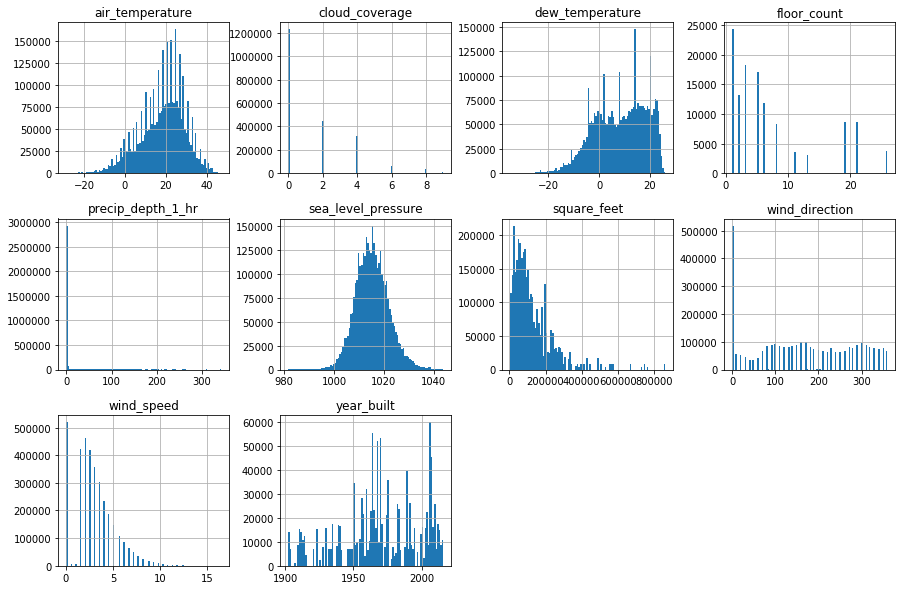

In [50]:
df1[numerical].hist(bins=100, figsize=(15, 10), layout=(3, 4));

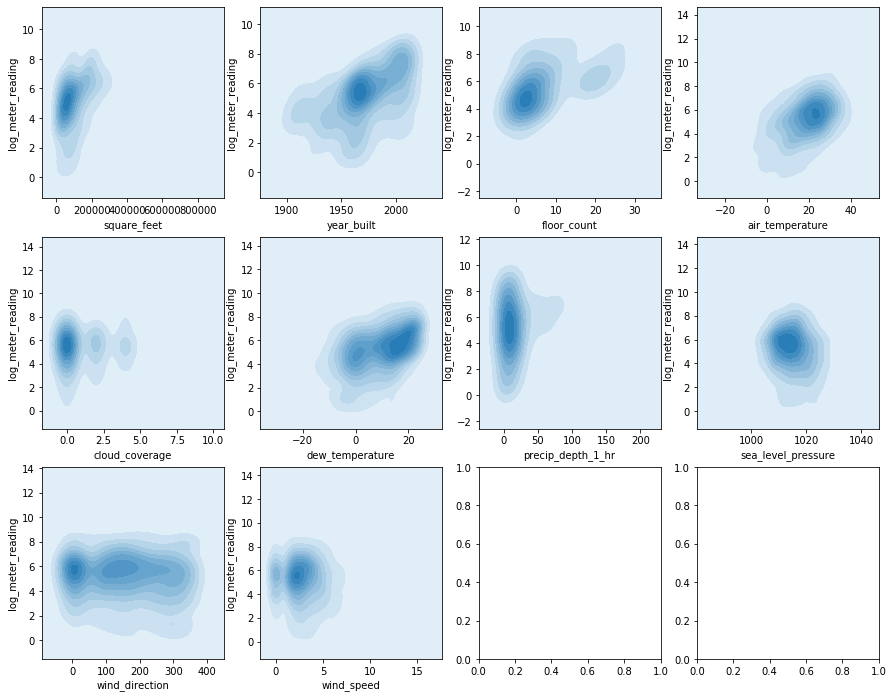

In [73]:
fig, ax = plt.subplots(3, 4, figsize=(15, 12))
for var, subplot in zip(numerical, ax.flatten()):
    d = df1[[var, 'log_meter_reading']].dropna()
    d = d.sample(int(0.001 * d.shape[0]))
    if var == 'precip_depth_1_hr':
        d = d.query('precip_depth_1_hr > 0')
    sns.kdeplot(d[var], d['log_meter_reading'], shade=True, ax=subplot)
    subplot.set_xlabel(var)
    subplot.set_ylabel('log_meter_reading')

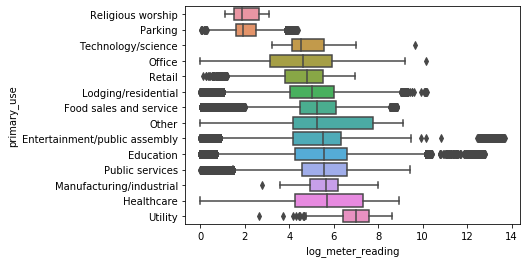

In [52]:
sorted_nb = df1.groupby(['primary_use'])['log_meter_reading'].median().sort_values()
sns.boxplot(y=df1['primary_use'], x=df1['log_meter_reading'], order=sorted_nb.index, orient='h')

## Steam (meter = 2) 

In [53]:
df2.head()

,building_id,meter,timestamp,meter_reading,site_id,primary_use,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,log_meter_reading
8053599,747,2,2016-01-01 01:00:00,114.9840,6,Education,30531,NaN,NaN,10.0,0.0,8.9,0.0,1019.8,0.0,0.0,4.753452
8053603,750,2,2016-01-01 01:00:00,4795.7200,6,Education,35990,NaN,NaN,10.0,0.0,8.9,0.0,1019.8,0.0,0.0,8.475688
8053607,753,2,2016-01-01 01:00:00,324.2260,6,Education,39558,NaN,NaN,10.0,0.0,8.9,0.0,1019.8,0.0,0.0,5.784520
8053608,754,2,2016-01-01 01:00:00,43.2803,6,Office,41337,NaN,NaN,10.0,0.0,8.9,0.0,1019.8,0.0,0.0,3.790540
8053611,757,2,2016-01-01 01:00:00,959.6090,6,Education,46813,NaN,NaN,10.0,0.0,8.9,0.0,1019.8,0.0,0.0,6.867567


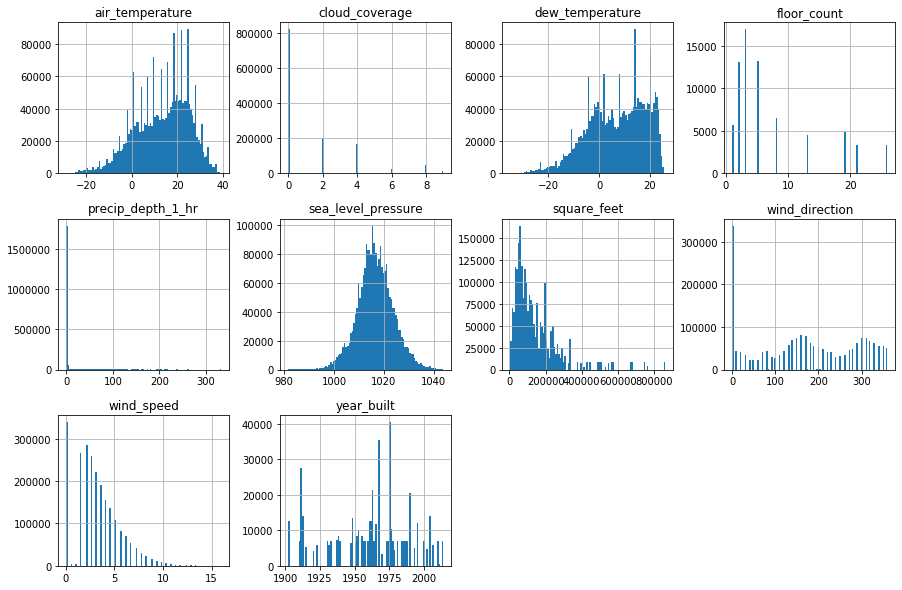

In [54]:
df2[numerical].hist(bins=100, figsize=(15, 10), layout=(3, 4));

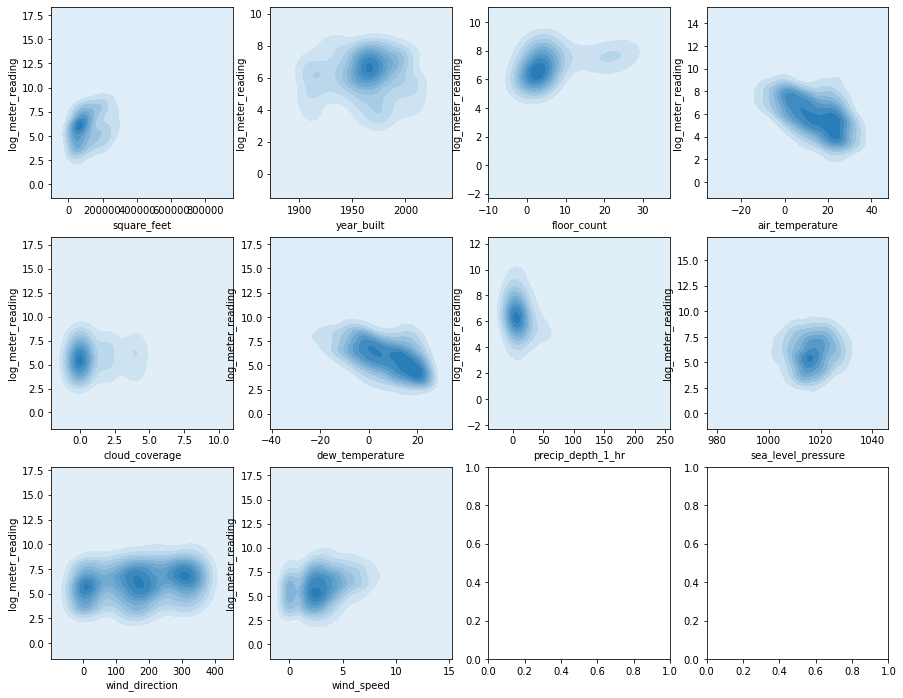

In [74]:
fig, ax = plt.subplots(3, 4, figsize=(15, 12))
for var, subplot in zip(numerical, ax.flatten()):
    d = df2[[var, 'log_meter_reading']].dropna()
    d = d.sample(int(0.001 * d.shape[0]))
    if var == 'precip_depth_1_hr':
        d = d.query('precip_depth_1_hr > 0')
    sns.kdeplot(d[var], d['log_meter_reading'], shade=True, ax=subplot)
    subplot.set_xlabel(var)
    subplot.set_ylabel('log_meter_reading')

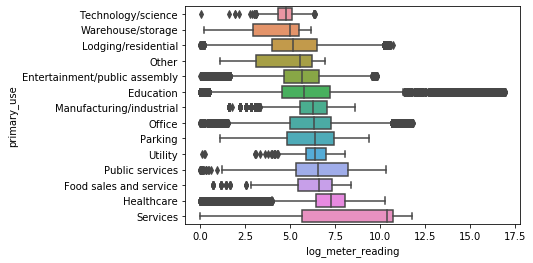

In [57]:
sorted_nb = df2.groupby(['primary_use'])['log_meter_reading'].median().sort_values()
sns.boxplot(y=df2['primary_use'], x=df2['log_meter_reading'], order=sorted_nb.index, orient='h')

## Hotwater (meter = 3) 

In [58]:
df3.head()

,building_id,meter,timestamp,meter_reading,site_id,primary_use,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,log_meter_reading
1076672,112,3,2016-01-01 00:00:00,96.9780,1,Education,32206,NaN,6.0,3.8,NaN,2.4,NaN,1020.9,240.0,3.1,4.584743
1076674,113,3,2016-01-01 00:00:00,19.5970,1,Education,100481,1958.0,9.0,3.8,NaN,2.4,NaN,1020.9,240.0,3.1,3.025145
1076676,114,3,2016-01-01 00:00:00,100.0000,1,Education,139683,1958.0,13.0,3.8,NaN,2.4,NaN,1020.9,240.0,3.1,4.615121
1076680,117,3,2016-01-01 00:00:00,19.6809,1,Education,15489,2004.0,4.0,3.8,NaN,2.4,NaN,1020.9,240.0,3.1,3.029211
1076683,119,3,2016-01-01 00:00:00,200.0000,1,Education,91149,2007.0,7.0,3.8,NaN,2.4,NaN,1020.9,240.0,3.1,5.303305


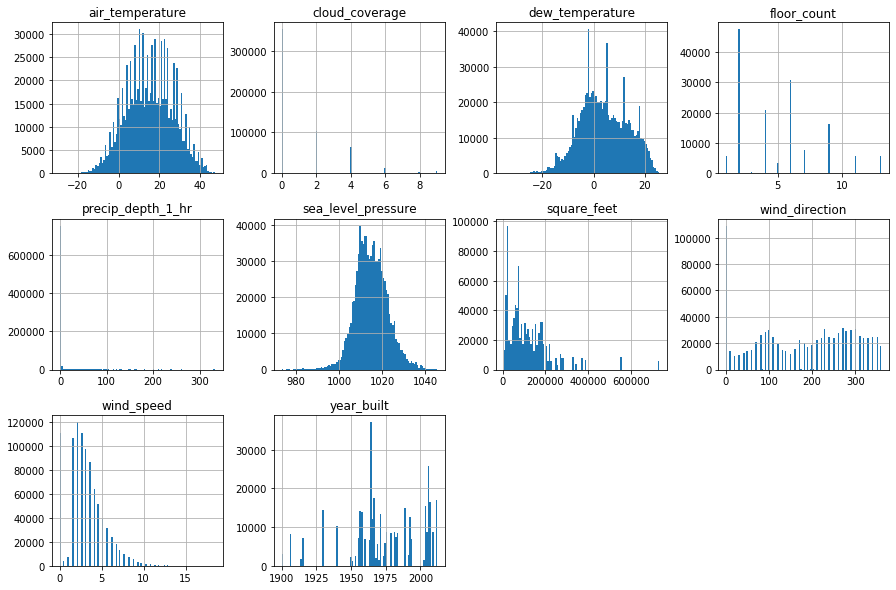

In [59]:
df3[numerical].hist(bins=100, figsize=(15, 10), layout=(3, 4));

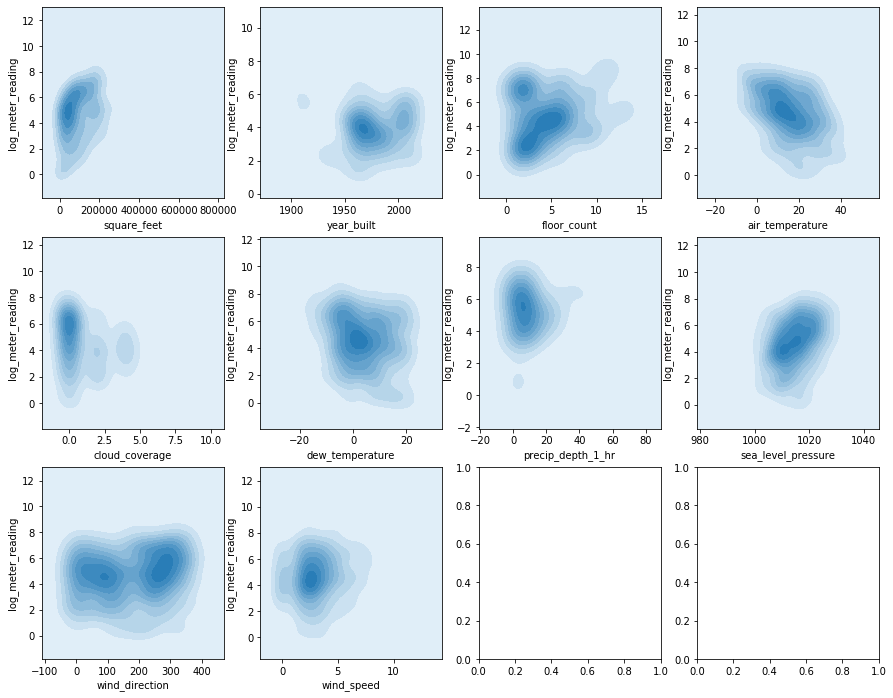

In [75]:
fig, ax = plt.subplots(3, 4, figsize=(15, 12))
for var, subplot in zip(numerical, ax.flatten()):
    d = df3[[var, 'log_meter_reading']].dropna()
    d = d.sample(int(0.001 * d.shape[0]))
    if var == 'precip_depth_1_hr':
        d = d.query('precip_depth_1_hr > 0')
    sns.kdeplot(d[var], d['log_meter_reading'], shade=True, ax=subplot)
    subplot.set_xlabel(var)
    subplot.set_ylabel('log_meter_reading')

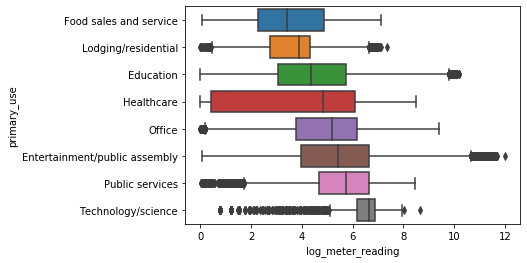

In [76]:
sorted_nb = df3.groupby(['primary_use'])['log_meter_reading'].median().sort_values()
sns.boxplot(y=df3['primary_use'], x=df3['log_meter_reading'], order=sorted_nb.index, orient='h')